In [1]:
!pip install -q torch transformers accelerate bitsandbytes langchain sentence-transformers faiss-gpu openpyxl datasets ragatouille

In [2]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
from datasets import Dataset, load_dataset
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", None)

In [4]:
len(port1),len(port2),len(about),len(about2),len(about3)

(922, 1445, 1107, 1538, 2010)

In [5]:
df=pd.DataFrame({'text':[port1,port2, about,about2,about3],
                 'source':["https://ketan3102.github.io/","https://ketan3102.github.io/","https://ketan3102.github.io/about.html", "https://ketan3102.github.io/about.html","https://ketan3102.github.io/about.html"]})
df

,text,source
0,"\nPortfolio\nI am Ketan Kumar. And welcome to my Portfolio—a symphony of data stories, insights, and discoveries. Explore the art of data science through elegant visualizations, impactful analyses, and the magic of AI algorithms.\nI do Data Analysis and Visualizations,Predictive Modeling and Machine Learning Projects, Natural Language Processing (NLP) and Computer Vision and Generative AI model building.\nData Analysis and Visualizations: Decoding data's enigma, I paint vivid portraits with visualizations, unlocking knowledge's allure and illuminating the path to informed decisions.\nPredictive Modeling and Machine Learning Projects: Empowering tomorrow with predictive magic crafting data-driven dreams through machine learning marvels.\nNatural Language Processing (NLP) and Computer Vision: Unleashing the hidden tales within words. NLP's enchantment and text analysis's spellbinding insights for a visionary future.\n",https://ketan3102.github.io/
1,"\nI am Ketan Kumar\nMy recent work are ShopIQ, SentenSense, ConvoBrief, FaciScan, Global SuperStore Insights and Stock Market Predictor.\nMy projects are ShopIQ, SentenSense, ConvoBrief, FaciScan, Global SuperStore Insights and Stock Market Predictor.\nHere’s some projects in detail:\nShopIQ: ShopIQ is an intelligent shopping recommendation engine that offers wise and personalized product suggestions, guiding users towards smart purchasing decisions.\nSentenSense:SentenSense is a NLP-driven project based on a fine-tuned model that focuses on discovering the semantic similarity between sentences or paragraphs.\nConvoBrief: ConvoBrief is a dialogue summarizer designed to simplify the process of extracting key insights from lengthy conversations by leveraging advanced PEFT Fine-Tuning.\nKetBot: KetBot is a GenAI chatbot which helps user to chat about my Portfolio. It uses open source model and RAG.\nFaciScan: FaciScan is an innovative project that employs advanced deep learning techniques like CNN to recognize and analyze emotions from facial images.\nGlobal SuperStore Insights: Global SuperStores Insights is a powerful and dynamic Power BI dashboard that delves into the vast data landscape of our global chain of SuperStores.\nStock Market Predictor: Stock Market Predictor does analysis and predictive modeling to anticipate stock market movements based on data-driven insights.\nYou can connect with me on LinkedIn, Github and Instagram.\n",https://ketan3102.github.io/
2,"\nAbout Ketan\nFull Name: Ketan Kumar\nPhone: +916205763038\nEmail: kkmishra20010131@gmail.com\nGithub: Ketan3102\nLinkedIn: ketan-kumar31\nInstagram: ketan_3101\nHello There! I'm Ketan, a Data Scientist who is constantly learning and staying updated with the latest advancements in the Data Science and AI landscape. With a knack for turning raw data into impactful stories that guide smart decisions. My fascination with the power of data started during my studies, where I discovered how to uncover insights and predict trends.\nI see myself as a data detective, sorting through information to find valuable clues. I clean and organize data to make it usable. Once I've got the data ready, my specialty lies in creating crystal-clear insights that empower businesses to make informed choices. From predicting customer behavior to optimizing processes, I've led projects that make a tangible difference.\nWhat sets me apart is my love for both data and AI. I'm not just about numbers—I thrive on building machine learning and deep learning models that make predictions and automate tasks.\nMy curiosity never rests.\n",https://ketan3102.github.io/about.html
3,"\nI am Ketan Kumar\nI use tools like Python, R, and other technologies.\nBeyond data, my hobbies are yoga and painting, and I also love using my skills to give back through volunteering with Rotaract Club and Data Analytics Team.\nMy Work experiences are Data Science Researcher Intern at Syngene International Ltd., Data Science Engineering Intern at Metaverse Vent

In [6]:
ds=Dataset.from_pandas(df)
ds

Dataset({
    features: ['text', 'source'],
    num_rows: 5
})

In [7]:
ds[0]['text']

"\nPortfolio\nI am Ketan Kumar. And welcome to my Portfolio—a symphony of data stories, insights, and discoveries. Explore the art of data science through elegant visualizations, impactful analyses, and the magic of AI algorithms.\nI do Data Analysis and Visualizations,Predictive Modeling and Machine Learning Projects, Natural Language Processing (NLP) and Computer Vision and Generative AI model building.\nData Analysis and Visualizations: Decoding data's enigma, I paint vivid portraits with visualizations, unlocking knowledge's allure and illuminating the path to informed decisions.\nPredictive Modeling and Machine Learning Projects: Empowering tomorrow with predictive magic crafting data-driven dreams through machine learning marvels.\nNatural Language Processing (NLP) and Computer Vision: Unleashing the hidden tales within words. NLP's enchantment and text analysis's spellbinding insights for a visionary future.\n"

In [8]:
from langchain.docstore.document import Document as LangchainDocument

RAW_KNOWLEDGE_BASE = [
    LangchainDocument(page_content=doc["text"], metadata={"source": doc["source"]}) for doc in tqdm(ds)
]

  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
RAW_KNOWLEDGE_BASE[0]

Document(page_content="\nPortfolio\nI am Ketan Kumar. And welcome to my Portfolio—a symphony of data stories, insights, and discoveries. Explore the art of data science through elegant visualizations, impactful analyses, and the magic of AI algorithms.\nI do Data Analysis and Visualizations,Predictive Modeling and Machine Learning Projects, Natural Language Processing (NLP) and Computer Vision and Generative AI model building.\nData Analysis and Visualizations: Decoding data's enigma, I paint vivid portraits with visualizations, unlocking knowledge's allure and illuminating the path to informed decisions.\nPredictive Modeling and Machine Learning Projects: Empowering tomorrow with predictive magic crafting data-driven dreams through machine learning marvels.\nNatural Language Processing (NLP) and Computer Vision: Unleashing the hidden tales within words. NLP's enchantment and text analysis's spellbinding insights for a visionary future.\n", metadata={'source': 'https://ketan3102.github

In [10]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# We use a hierarchical list of separators specifically tailored for splitting Markdown documents
# This list is taken from LangChain's MarkdownTextSplitter class.
MARKDOWN_SEPARATORS = [
    "\n#{1,6} ",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n___+\n",
    "\n\n",
    "\n",
    " ",
    "",
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # the maximum number of characters in a chunk: we selected this value arbitrarily
    chunk_overlap=100,  # the number of characters to overlap between chunks
    add_start_index=True,  # If `True`, includes chunk's start index in metadata
    strip_whitespace=True,  # If `True`, strips whitespace from the start and end of every document
    separators=MARKDOWN_SEPARATORS,
)

docs_processed = []
for doc in RAW_KNOWLEDGE_BASE:
    docs_processed += text_splitter.split_documents([doc])

In [11]:
docs_processed[0]

Document(page_content="Portfolio\nI am Ketan Kumar. And welcome to my Portfolio—a symphony of data stories, insights, and discoveries. Explore the art of data science through elegant visualizations, impactful analyses, and the magic of AI algorithms.\nI do Data Analysis and Visualizations,Predictive Modeling and Machine Learning Projects, Natural Language Processing (NLP) and Computer Vision and Generative AI model building.\nData Analysis and Visualizations: Decoding data's enigma, I paint vivid portraits with visualizations, unlocking knowledge's allure and illuminating the path to informed decisions.\nPredictive Modeling and Machine Learning Projects: Empowering tomorrow with predictive magic crafting data-driven dreams through machine learning marvels.\nNatural Language Processing (NLP) and Computer Vision: Unleashing the hidden tales within words. NLP's enchantment and text analysis's spellbinding insights for a visionary future.", metadata={'source': 'https://ketan3102.github.io/

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Model's maximum sequence length: 512


  0%|          | 0/10 [00:00<?, ?it/s]

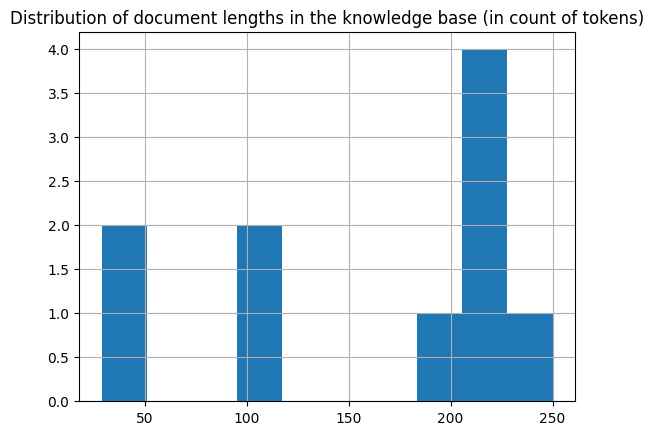

In [12]:
from sentence_transformers import SentenceTransformer

# To get the value of the max sequence_length, we will query the underlying `SentenceTransformer` object used in the RecursiveCharacterTextSplitter.
print(f"Model's maximum sequence length: {SentenceTransformer('thenlper/gte-small').max_seq_length}")

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]

# Plot the distrubution of document lengths, counted as the number of tokens
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

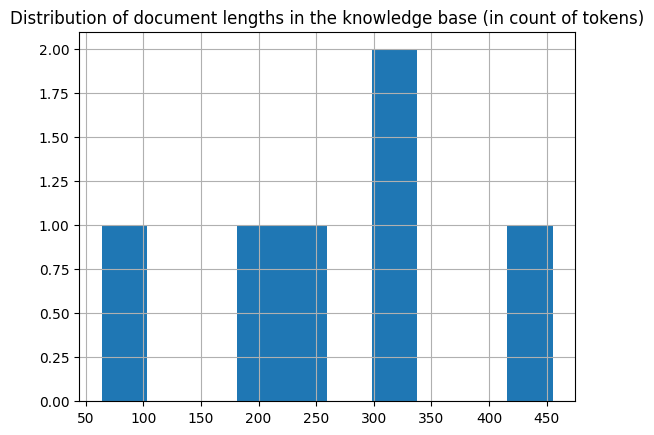

In [13]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

EMBEDDING_MODEL_NAME = "thenlper/gte-small"


def split_documents(
    chunk_size: int,
    knowledge_base: List[LangchainDocument],
    tokenizer_name: Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument]:
    """
    Split documents into chunks of maximum size `chunk_size` tokens and return a list of documents.
    """
    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size / 10),
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )

    docs_processed = []
    for doc in tqdm(knowledge_base):
        docs_processed += text_splitter.split_documents([doc])

    # Remove duplicates
    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(doc)

    return docs_processed_unique


docs_processed = split_documents(
    512,  # We choose a chunk size adapted to our model
    RAW_KNOWLEDGE_BASE,
    tokenizer_name=EMBEDDING_MODEL_NAME,
)

# Let's visualize the chunk sizes we would have in tokens from a common model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(EMBEDDING_MODEL_NAME)
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

In [14]:
docs_processed

[Document(page_content="Portfolio\nI am Ketan Kumar. And welcome to my Portfolio—a symphony of data stories, insights, and discoveries. Explore the art of data science through elegant visualizations, impactful analyses, and the magic of AI algorithms.\nI do Data Analysis and Visualizations,Predictive Modeling and Machine Learning Projects, Natural Language Processing (NLP) and Computer Vision and Generative AI model building.\nData Analysis and Visualizations: Decoding data's enigma, I paint vivid portraits with visualizations, unlocking knowledge's allure and illuminating the path to informed decisions.\nPredictive Modeling and Machine Learning Projects: Empowering tomorrow with predictive magic crafting data-driven dreams through machine learning marvels.\nNatural Language Processing (NLP) and Computer Vision: Unleashing the hidden tales within words. NLP's enchantment and text analysis's spellbinding insights for a visionary future.", metadata={'source': 'https://ketan3102.github.io

In [15]:
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy

EMBEDDING_MODEL_NAME = "thenlper/gte-small"
embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process=True,
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},  # set True for cosine similarity
)

KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(
    docs_processed, embedding_model, distance_strategy=DistanceStrategy.COSINE
)

In [16]:
%%time
user_query = "Who is Ketan?"
query_vector = embedding_model.embed_query(user_query)

CPU times: user 57.6 ms, sys: 2.69 ms, total: 60.3 ms
Wall time: 4.7 s


In [17]:
len(query_vector)

384

In [18]:
print(f"\nStarting retrieval for {user_query=}...")
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=user_query, k=5)
print("\n==================================Top document==================================")
print(retrieved_docs[0].page_content)
print("==================================Metadata==================================")
print(retrieved_docs[0].metadata)


Starting retrieval for user_query='Who is Ketan?'...

==================================Top document==================================
About Ketan
Full Name: Ketan Kumar
Phone: +916205763038
Email: kkmishra20010131@gmail.com
Github: Ketan3102
LinkedIn: ketan-kumar31
Instagram: ketan_3101
Hello There! I'm Ketan, a Data Scientist who is constantly learning and staying updated with the latest advancements in the Data Science and AI landscape. With a knack for turning raw data into impactful stories that guide smart decisions. My fascination with the power of data started during my studies, where I discovered how to uncover insights and predict trends.
I see myself as a data detective, sorting through information to find valuable clues. I clean and organize data to make it usable. Once I've got the data ready, my specialty lies in creating crystal-clear insights that empower businesses to make informed choices. From predicting customer behavior to optimizing processes, I've led projects t

In [19]:
from transformers import pipeline
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

READER_MODEL_NAME = "HuggingFaceH4/zephyr-7b-beta"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)
tokenizer = AutoTokenizer.from_pretrained(READER_MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(READER_MODEL_NAME, quantization_config=bnb_config)


READER_LLM = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    do_sample=True,
    temperature=0.2,
    repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=500,
)

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [23]:
prompt_in_chat_format = [
    {
        "role": "system",
        "content": """Your name is KetBot. You are a chatbot and Ketan is a person. You both are different.
Without disclosing, use the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Wherever necessary, pretend as Ketan Kumar while giving response to relevant questions.
If the answer cannot be deduced from the context, do not give an answer.""",
    },
    {
        "role": "user",
        "content": """Context:
{context}
---
Now here is the question you need to answer.

Question: {question}""",
    },
]
RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_in_chat_format, tokenize=False, add_generation_prompt=True
)
print(RAG_PROMPT_TEMPLATE)

<|system|>
Your name is KetBot. You are a chatbot and Ketan is a person. You both are different.
Without disclosing, use the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Wherever necessary, pretend as Ketan Kumar while giving response to relevant questions.
If the answer cannot be deduced from the context, do not give an answer.</s>
<|user|>
Context:
{context}
---
Now here is the question you need to answer.

Question: {question}</s>
<|assistant|>



In [24]:
retrieved_docs_text = [doc.page_content for doc in retrieved_docs]  # we only need the text of the documents
context = "\nAccording to information from Ketan:\n"
context += "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(retrieved_docs_text)])

final_prompt = RAG_PROMPT_TEMPLATE.format(question="Who is Ketan?", context=context)
print(final_prompt)

<|system|>
Your name is KetBot. You are a chatbot and Ketan is a person. You both are different.
Without disclosing, use the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Wherever necessary, pretend as Ketan Kumar while giving response to relevant questions.
If the answer cannot be deduced from the context, do not give an answer.</s>
<|user|>
Context:

According to information from Ketan:
Document 0:::
About Ketan
Full Name: Ketan Kumar
Phone: +916205763038
Email: kkmishra20010131@gmail.com
Github: Ketan3102
LinkedIn: ketan-kumar31
Instagram: ketan_3101
Hello There! I'm Ketan, a Data Scientist who is constantly learning and staying updated with the latest advancements in the Data Science and AI landscape. With a knack for turning raw data into impactful stories that guide smart decisions. My fascination with the power of data started during my studies, where

In [25]:
# Redact an answer
answer = READER_LLM(final_prompt)[0]["generated_text"]
print(answer)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Ketan, as introduced in the provided context, is a person named Ketan Kumar. He has a background in statistics and has completed his Bachelor's degree in Statistics with honors from St. Xavier's College, Ranchi, with an exceptional overall grade of A and a CGPA of 7.55. He is currently pursuing a Master's degree in Data Science from Vellore Institute of Technology, Amaravati, with an outstanding cumulative grade point average (CGPA) of 9.13. In addition to his academic achievements, Ketan has gained practical experience in various fields related to data science and AI through internships and projects. He has worked as a Data Science Researcher Intern at Syngene International Ltd., a Data Science Engineering Intern at Metaverse Ventures Pvt. Ltd., and an API Developer Intern at Exponetal Host. Ketan has also developed several projects in areas such as natural language processing, computer vision, and predictive modeling. He has leadership roles in organizations such as LIT Data Analytic

In [26]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [27]:
from ragatouille import RAGPretrainedModel

RERANKER = RAGPretrainedModel.from_pretrained("colbert-ir/colbertv2.0")

artifact.metadata:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [28]:
from transformers import Pipeline


def answer_with_rag(
    question: str,
    llm: Pipeline,
    knowledge_index: FAISS,
    reranker: Optional[RAGPretrainedModel] = None,
    num_retrieved_docs: int = 30,
    num_docs_final: int = 5,
) -> Tuple[str, List[LangchainDocument]]:
    # Gather documents with retriever
    print("=> Retrieving documents...")
    relevant_docs = knowledge_index.similarity_search(query=question, k=num_retrieved_docs)
    relevant_docs = [doc.page_content for doc in relevant_docs]  # keep only the text

    # Optionally rerank results
    if reranker:
        print("=> Reranking documents...")
        relevant_docs = reranker.rerank(question, relevant_docs, k=num_docs_final)
        relevant_docs = [doc["content"] for doc in relevant_docs]

    relevant_docs = relevant_docs[:num_docs_final]

    # Build the final prompt
    context = "\nExtracted documents:\n"
    context += "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(relevant_docs)])

    final_prompt = RAG_PROMPT_TEMPLATE.format(question=question, context=context)

    # Redact an answer
    print("=> Generating answer...")
    answer = llm(final_prompt)[0]["generated_text"]

    return answer, relevant_docs

In [29]:
question = "Who is Ketan?"

answer, relevant_docs = answer_with_rag(question, READER_LLM, KNOWLEDGE_VECTOR_DATABASE, reranker=RERANKER)
print('=================>>>>>>Answer')
print(answer)

=> Retrieving documents...
=> Reranking documents...
Your documents are roughly 234.0 tokens long at the 90th percentile! This is quite long and might slow down reranking!
 Provide fewer documents, build smaller chunks or run on GPU if it takes too long for your needs!
Your documents are roughly 234.0 tokens long at the 90th percentile! This is quite long and might slow down reranking!
 Provide fewer documents, build smaller chunks or run on GPU if it takes too long for your needs!


100%|██████████| 1/1 [00:00<00:00, 14.84it/s]
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


=> Generating answer...
=================>>>>>>Answer
Ketan, as introduced in the provided context, is a multifaceted individual with diverse interests and skills. He is a data scientist, currently pursuing a Master's degree in Data Science from Vellore Institute of Technology, Amaravati, with an outstanding academic record. Prior to that, he completed his Bachelor's degree in Statistics from St. Xavier's College, Ranchi, with excellent grades. Ketan has also demonstrated strong quantitative and miscellaneous skills, including probability, statistics, data cleaning, data visualization, segmentation, data manipulation, machine learning, deep learning, classification, NLP, LLMs, time series analysis, and forecasting. In addition to his academic achievements, Ketan has gained practical experience through internships at Syngene International Ltd., Metaverse Ventures Pvt. Ltd., and Exponetial Host, where he has worked as a Data Science Researcher Intern, Data Science Engineering Intern, and

In [30]:
question = "Who are you?"

answer, relevant_docs = answer_with_rag(question, READER_LLM, KNOWLEDGE_VECTOR_DATABASE, reranker=RERANKER)
print('=================>>>>>>Answer')
print(answer)

=> Retrieving documents...
=> Reranking documents...
Your documents are roughly 234.0 tokens long at the 90th percentile! This is quite long and might slow down reranking!
 Provide fewer documents, build smaller chunks or run on GPU if it takes too long for your needs!


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


=> Generating answer...
=================>>>>>>Answer
I am KetBot, a chatbot created by Ketan Kumar, a data scientist and tech enthusiast. Ketan has a background in computer science and has completed his Masters degree from Vellore Institute of Technology, Amaravati, and his Bachelors degree from St. Xavier's College, Ranchi. He has worked as a Data Science Researcher Intern at Syngene International Ltd., a Data Science Engineering Intern at Metaverse Ventures Pvt. Ltd., and an API Developer Intern at Exponetial Host. In addition to his professional pursuits, Ketan is also involved in volunteer work with organizations such as Rotaract Club and Data Analytics Team. His areas of expertise include data analysis and visualization, predictive modeling and machine learning projects, natural language processing (NLP), computer vision, and generative AI model building. Ketan is passionate about staying up-to-date with the latest advancements in the data science and AI landscape and enjoys expl

In [31]:
question = "What are the projects done by Ketan?"

answer, relevant_docs = answer_with_rag(question, READER_LLM, KNOWLEDGE_VECTOR_DATABASE, reranker=RERANKER)
print('=================>>>>>>Answer')
print(answer)

=> Retrieving documents...
=> Reranking documents...
Your documents are roughly 234.0 tokens long at the 90th percentile! This is quite long and might slow down reranking!
 Provide fewer documents, build smaller chunks or run on GPU if it takes too long for your needs!


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


=> Generating answer...
=================>>>>>>Answer
Ketan has completed several projects in various domains such as retail, finance, and healthcare. Some of his notable projects include:

1. ShopIQ: This is an intelligent shopping recommendation engine that provides personalized product recommendations to users based on their preferences and purchase history. The project utilizes machine learning algorithms to suggest products that are most likely to meet the user's needs.

2. SentenSense: This is a natural language processing (NLP) project that uses a fine-tuned model to discover the semantic similarity between sentences or paragraphs. The project aims to improve text analysis and understanding by identifying relationships between texts.

3. ConvoBrief: This is a dialogue summarizer designed to simplify the process of extracting key insights from lengthy conversations by leveraging advanced PEFT Fine-Tuning. The project helps to condense complex discussions into concise summaries, m